In [14]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
from sklearn.ensemble import RandomForestRegressor

In [15]:
da = pd.read_csv('../dataset/Mall_Customers.csv', index_col='CustomerID')
da

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [16]:
da.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [17]:
da.rename({'Genre' : 'Gender'}, axis=1, inplace = True)
da.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [18]:
genn = LabelEncoder()
da['Gender'] = genn.fit_transform(da['Gender'])
da.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [19]:
scaler = StandardScaler()
X = da[['Gender','Age', 'Annual Income (k$)']]
x = scaler.fit_transform(X)
y = da['Spending Score (1-100)']

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.2,random_state=0)

In [21]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(xtrain, ytrain)
model.score(x,y) * 100

77.17625327280179

In [22]:
model2 = RandomForestRegressor(n_estimators=200, n_jobs=-1)
model2.fit(xtrain, ytrain)
model2.score(x,y) * 100

75.87439340456801

In [23]:
ypred  = model2.predict(x)

In [24]:
da['prediction'] = ypred

In [25]:
da

,Gender,Age,Annual Income (k$),Spending Score (1-100),prediction
CustomerID,,,,,
1,1,19,15,39,37.000
2,1,21,15,81,68.830
3,0,20,16,6,26.530
4,0,23,16,77,69.985
5,0,31,17,40,59.650
...,...,...,...,...,...
196,0,35,120,79,63.205
197,0,45,126,28,25.065
198,1,32,126,74,62.485


In [28]:
px.scatter_3d(da,x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',color='Spending Score (1-100)')

In [29]:
px.scatter_3d(da,x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',color='prediction')

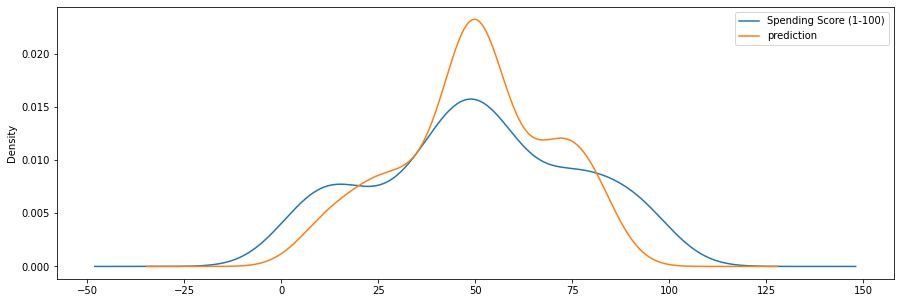

In [30]:
ax = da['Spending Score (1-100)'].plot(kind='kde',figsize=(15,5),)
da['prediction'].plot(kind='kde',figsize=(15,5),ax=ax)
plt.legend()
plt.show()